In [8]:
import pandas as pd
import numpy as np
import math
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# select the style from fivethityeight website
plt.style.use('fivethirtyeight') 
mpl.rcParams['lines.linewidth'] = 2

# predefined figsize
figsize=(25,20)

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

In [4]:
onColab = True
if onColab:
  from google.colab import drive
  drive.mount('/gdrive')
  %cd /gdrive/MyDrive/University/ANN/CHALLENGE2
  !ls

Mounted at /gdrive
/gdrive/MyDrive/University/ANN/CHALLENGE2
analysis.ipynb	 baseline_3_ckpt    baseline_5_ckpt  my_net_ckpt
baseline	 baseline_3_forSub  baseline_ckpt    my_net.ipynb
baseline_2	 baseline_4	    baseline.ipynb   simple
baseline_2_ckpt  baseline_4_ckpt    model.png	     simple_ckpt
baseline_3	 baseline_5	    my_net	     Training.csv


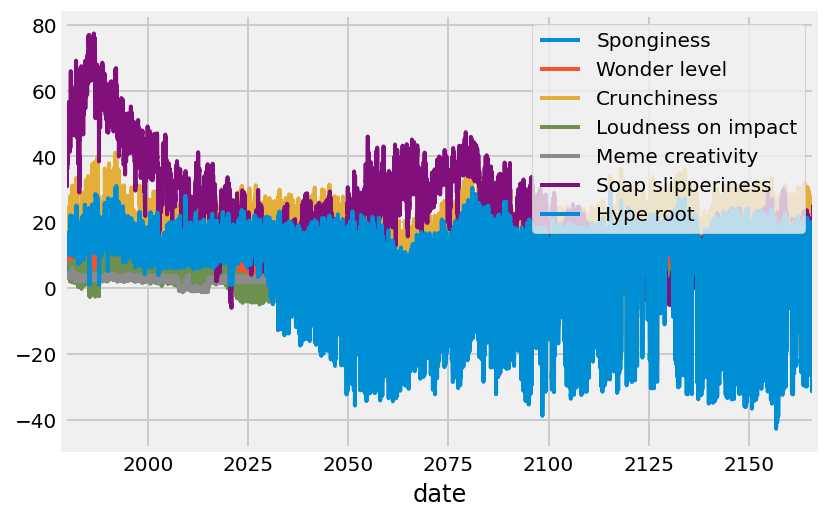

In [41]:
dataset = pd.read_csv('./Training.csv')

# JUST SOME OPERATIONS TO EASE THE ANALYSIS
dataset['date'] = pd.date_range(start='1/1/1979', periods=len(dataset), freq='D')
# Set the column 'Date' as index (skip if already done)
dataset = dataset.set_index('date')
# Specify datetime frequency
dataset = dataset.asfreq('D')
dataset.plot()


## Measure correlation

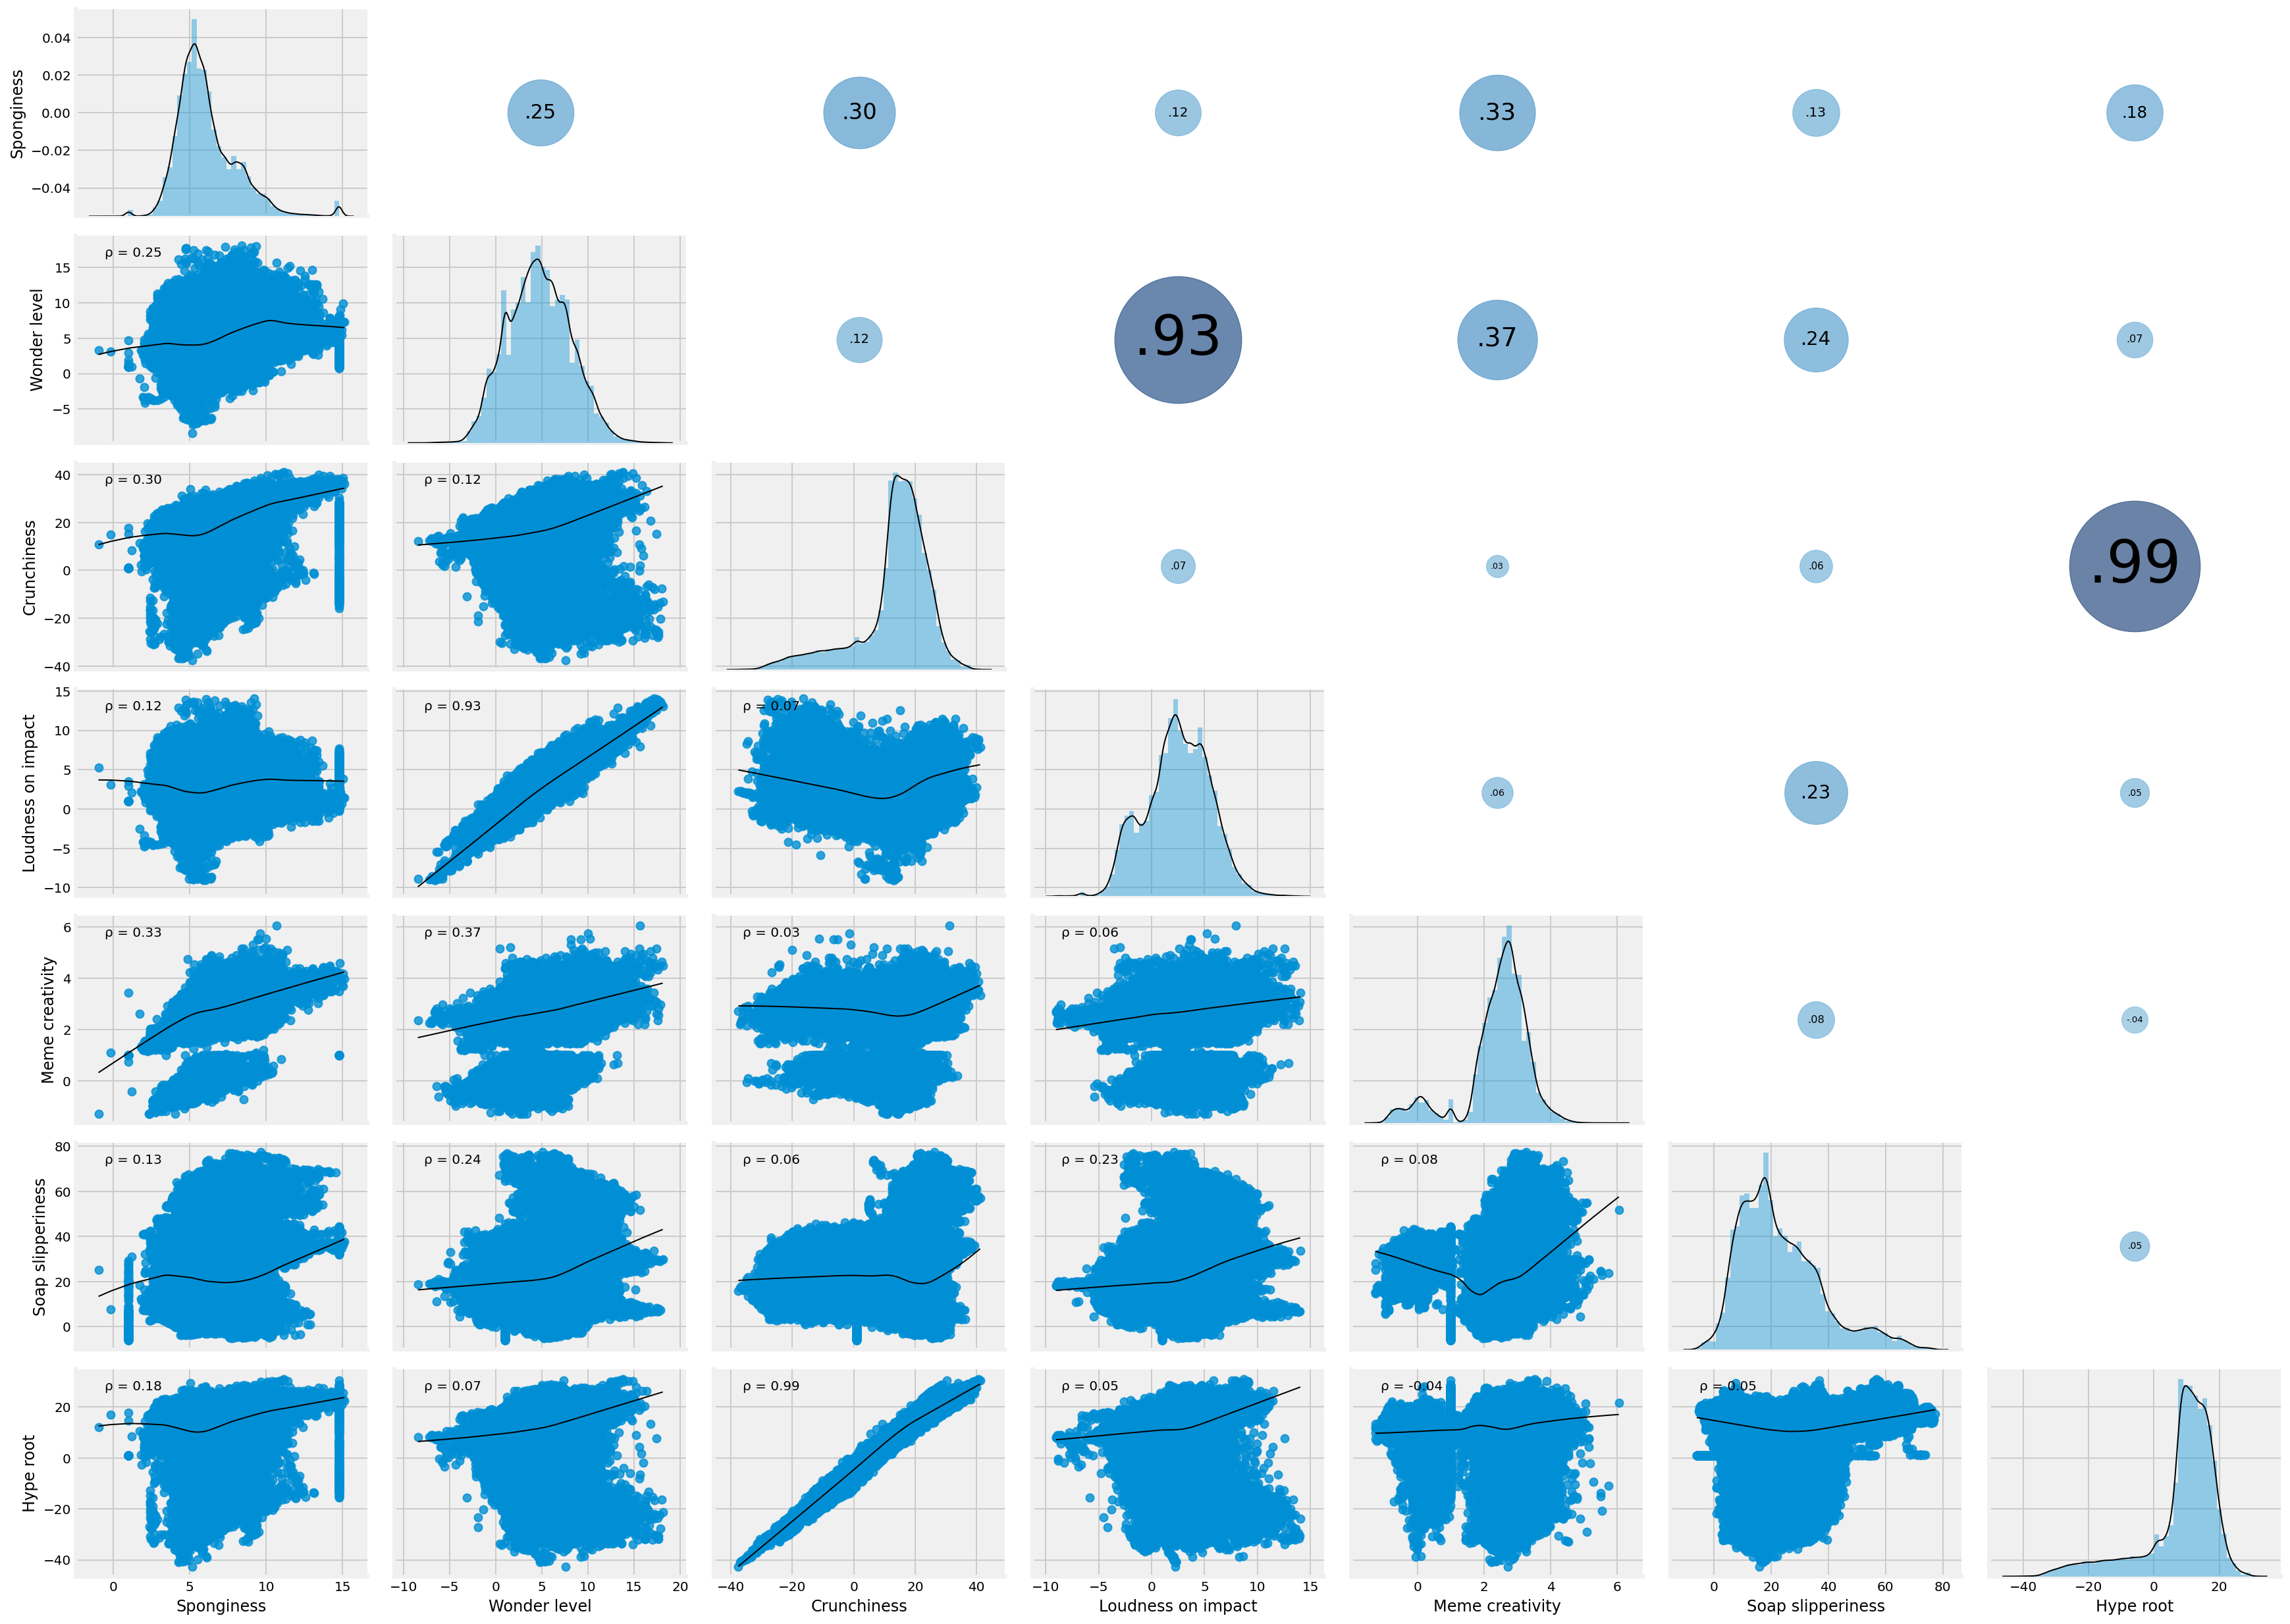

In [21]:
from scipy.stats import pearsonr

def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)
    
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="Blues",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)    
    
# g = sns.pairplot(stocks,palette=["Blues_d"])
g = sns.PairGrid(dataset, aspect=1.4, diag_sharey=False)
g.map_lower(corrfunc)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'Black','linewidth':1})
g.map_diag(sns.distplot, kde_kws={'color': 'Black','linewidth':1})
g.map_upper(corrdot)
plt.show()

## Auto correlation

In [29]:
for i in dataset:
  print("{0:20}: {1}".format(i, dataset[i].autocorr()))

Sponginess          : 0.9701337114852363
Wonder level        : 0.9611123139891025
Crunchiness         : 0.9761957058430966
Loudness on impact  : 0.9606696267165769
Meme creativity     : 0.9801841446614568
Soap slipperiness   : 0.9986492475183222
Hype root           : 0.9759879450755754


In [36]:
def autoCorrelationInd(th):
  """
  th: threshold under which we do not look anymore 
  """
  for i in dataset:
    j = 1
    while dataset[i].autocorr(j) > th: 
      j+=1
    print("{0:4} {1:20}: {2}".format(j, i, dataset[i].autocorr(j)))

In [37]:
autoCorrelationInd(0.9)

   4 Sponginess          : 0.8796395529679486
   6 Wonder level        : 0.8946777631453469
   5 Crunchiness         : 0.8856031005741091
   6 Loudness on impact  : 0.8957917183315909
  15 Meme creativity     : 0.8954037009920364
 141 Soap slipperiness   : 0.8999709617513648
   5 Hype root           : 0.8893154020760231


In [38]:
autoCorrelationInd(0.8)

   7 Sponginess          : 0.7957393050242646
  13 Wonder level        : 0.7958303296327612
   8 Crunchiness         : 0.7843212096259043
  14 Loudness on impact  : 0.7876101276262472
  48 Meme creativity     : 0.7994711712130295
2050 Soap slipperiness   : 0.7996564981814503
   8 Hype root           : 0.7893716118547173


In [39]:
autoCorrelationInd(0.7)

  12 Sponginess          : 0.692307545328279
  20 Wonder level        : 0.6999371763815136
  11 Crunchiness         : 0.6647073063775754
  22 Loudness on impact  : 0.6941650060178444
 224 Meme creativity     : 0.6983996754123548
3883 Soap slipperiness   : 0.6999787928572315
  11 Hype root           : 0.6684369917784182


In [40]:
autoCorrelationInd(0.6)

  18 Sponginess          : 0.5843594344962394
  41 Wonder level        : 0.5980834608590933
  13 Crunchiness         : 0.5778666688730018
 122 Loudness on impact  : 0.5990290463177645
 410 Meme creativity     : 0.5999598489387425
5128 Soap slipperiness   : 0.5998160397635042
  13 Hype root           : 0.5796396288578702
